In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.experimental import enable_iterative_imputer 
from sklearn.impute import IterativeImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier, RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, auc,roc_auc_score,roc_curve,recall_score,classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
import joblib
from mlxtend.plotting import plot_confusion_matrix

import warnings
warnings.filterwarnings("ignore")


In [2]:
student_info = pd.read_csv("C:\\Users\\HUY LOL\\Downloads\\OULAD\\Model\\student_info.csv")
student_info = student_info.drop(['Unnamed: 0'], axis = 1)
student_info

code_module code_presentation  id_student gender                region  \
0             AAA             2013J       11391      M   East Anglian Region   
1             AAA             2013J       28400      F              Scotland   
2             AAA             2013J       30268      F  North Western Region   
3             AAA             2013J       31604      F     South East Region   
4             AAA             2013J       32885      F  West Midlands Region   
...           ...               ...         ...    ...                   ...   
32588         GGG             2014J     2640965      F                 Wales   
32589         GGG             2014J     2645731      F   East Anglian Region   
32590         GGG             2014J     2648187      F          South Region   
32591         GGG             2014J     2679821      F     South East Region   
32592         GGG             2014J     2684003      F      Yorkshire Region   

         highest_education imd_band age_band  num_of_prev_attempts  \
0      Higher than A level  90-100%     55<=                     0   
1      Higher than A level   20-30%    35-55                     0   
2                  A Level   30-40%    35-55                     0   
3                  A Level   50-60%    35-55                     0   
4       Lower than A level   50-60%     0-35                     0   
...                    ...      ...      ...                   ...   
32588   Lower than A level   10-20%     0-35                     0   
32589   Lower than A level   40-50%    35-55                     0   
32590              A Level   20-30%     0-35                     0   
32591   Lower than A level  90-100%    35-55                     0   
32592  Higher than A level   50-60%    35-55                     0   

       studied_credits  ... Before_Click Access_Vle  date_registration  \
0                 77.0  ...         98.0        Yes              159.0   
1                 60.0  ...        215.0        Yes               53.0   
2                 60.0  ...        102.0        Yes               92.0   
3                 60.0  ...        169.0        Yes               52.0   
4                 60.0  ...        295.0        Yes              176.0   
...                ...  ...          ...        ...                ...   
32588             30.0  ...          2.0        Yes                4.0   
32589             30.0  ...          0.0        Yes               23.0   
32590             30.0  ...         15.0        Yes              129.0   
32591             30.0  ...         65.0        Yes               49.0   
32592             30.0  ...        115.0        Yes               28.0   

       date_unregistration  module_presentation_length  Year  Starting_month  \
0                       No                         268  2013        February   
1                       No                         268  2013        February   
2                      Yes                         268  2013        February   
3                       No                         268  2013        February   
4                       No                         268  2013        February   
...                    ...                         ...   ...             ...   
32588                   No                         269  2014        February   
32589                   No                         269  2014        February   
32590                   No                         269  2014        February   
32591                  Yes                         269  2014        February   
32592                   No                         269  2014        February   

      Late_submission   Code_Category  learn_again  
0                 0.0  Social_Science           No  
1                 2.0  Social_Science           No  
2                12.0  Social_Science           No  
3                 0.0  Social_Science           No  
4                 5.0  Social_Science           No  
...               ...             ..

In [3]:
import ipywidgets
from pandas_profiling import ProfileReport
profile = ProfileReport(student_info)
profile


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [4]:
profile.to_file(output_file="profile.pdf")

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [3]:
student_info.columns

Index(['code_module', 'code_presentation', 'id_student', 'gender', 'region',
       'highest_education', 'imd_band', 'age_band', 'num_of_prev_attempts',
       'studied_credits', 'disability', 'final_result', 'sum_click',
       'After_Click', 'Before_Click', 'Access_Vle', 'date_registration',
       'date_unregistration', 'module_presentation_length', 'Year',
       'Starting_month', 'Late_submission', 'Code_Category', 'learn_again'],
      dtype='object')

#### Feature Selection

In [3]:
data = student_info.drop(["module_presentation_length","Year","code_presentation","Starting_month","id_student","num_of_prev_attempts","sum_click","Access_Vle"], axis = 1)

In [5]:
len(data.columns)

16

In [92]:
# loại bỏ DL trùng:
print('Trước khi drop, records = ', data.shape[0])
data.drop_duplicates(inplace = True)
print('Sau khi drop, records = ', data.shape[0])

Trước khi drop, records =  32593
Sau khi drop, records =  32588


### Encode data

In [6]:
def Label_Encoder(data, columns):
  le = LabelEncoder()
  for col in columns:
    data[col] = le.fit_transform(data[col])
  return data
label_cols = data.select_dtypes("object").columns
Label_Encoder(data, label_cols)

code_module  gender  region  highest_education  imd_band  age_band  \
0                0       1       0                  1         9         2   
1                0       0       6                  1         2         1   
2                0       0       5                  0         3         1   
3                0       0       7                  0         5         1   
4                0       0      11                  2         5         0   
...            ...     ...     ...                ...       ...       ...   
32588            6       0      10                  2         1         0   
32589            6       0       0                  2         4         1   
32590            6       0       8                  0         2         0   
32591            6       0       7                  2         9         1   
32592            6       0      12                  1         5         1   

       studied_credits  disability  final_result  After_Click  Before_Click  \
0                 77.0           0             1        836.0          98.0   
1                 60.0           0             1       1220.0         215.0   
2                 60.0           1             0        179.0         102.0   
3                 60.0           0             1       1989.0         169.0   
4                 60.0           0             1        739.0         295.0   
...                ...         ...           ...          ...           ...   
32588             30.0           0             0         39.0           2.0   
32589             30.0           0             1        893.0           0.0   
32590             30.0           1             1        297.0          15.0   
32591             30.0           0             0        210.0          65.0   
32592             30.0           0             1        501.0         115.0   

       date_registration  date_unregistration  Late_submission  Code_Category  \
0                  159.0                    0              0.0              1   
1                   53.0                    0              2.0              1   
2                   92.0                    1             12.0              1   
3                   52.0                    0              0.0              1   
4                  176.0                    0              5.0              1   
...                  ...                  ...              ...            ...   
32588                4.0                    0             12.0              1   
32589               23.0                    0              2.0              1   
32590              129.0                    0              0.0              1   
32591               49.0                    1              0.0              1   
32592               28.0                    0              0.0              1   

       learn_again  
0                0  
1                0  
2                0  
3                0  
4                0  
...            ...  
32588            0  
32589            0  
32590            0  
32591            0  
32592            0  

[32593 rows x 16 columns]

# Buid Model

### Chia tập train, tập test

In [7]:
feature = data.drop(['final_result'], axis = 1)
target  = data['final_result'].values

train,test= train_test_split(data, test_size=0.25,random_state=123, stratify=data.final_result)# stratify the outcome
X_train =train.drop(["final_result"], axis = 1)
X_test = test.drop(["final_result"], axis = 1)
Y_train = train['final_result'].values
Y_test = test['final_result'].values

In [66]:
num_folds = 10
seed= 123
scoring= 'accuracy'

models = []

# Decision Tree
models.append(('CART', DecisionTreeClassifier()))
#Bagging
models.append(('RF', RandomForestClassifier()))
models.append(('ExtraTree', ExtraTreesClassifier()))
#Boosting
models.append(('ADa', AdaBoostClassifier()))

results = []
names = []
for name, model in models:
  kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
  cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)

  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)

CART: 0.844483 (0.007321)
RF: 0.893417 (0.007262)
ExtraTree: 0.885070 (0.006399)
ADa: 0.887811 (0.008336)


In [67]:
results_df = pd.DataFrame(results, index = names, columns = ["fold" + str(i) for i in range(1,11)])
results_df

fold1     fold2     fold3     fold4     fold5     fold6  \
CART       0.844990  0.840016  0.856792  0.851882  0.849018  0.838380   
RF         0.892434  0.890753  0.903846  0.905892  0.893208  0.893208   
ExtraTree  0.890389  0.880524  0.887889  0.900164  0.881751  0.880933   
ADa        0.897342  0.885025  0.902619  0.898936  0.883388  0.884615   

              fold7     fold8     fold9    fold10  
CART       0.833879  0.834697  0.851064  0.844108  
RF         0.882160  0.883797  0.898527  0.890344  
ExtraTree  0.877250  0.882979  0.888298  0.880524  
ADa        0.875614  0.880115  0.886252  0.884206

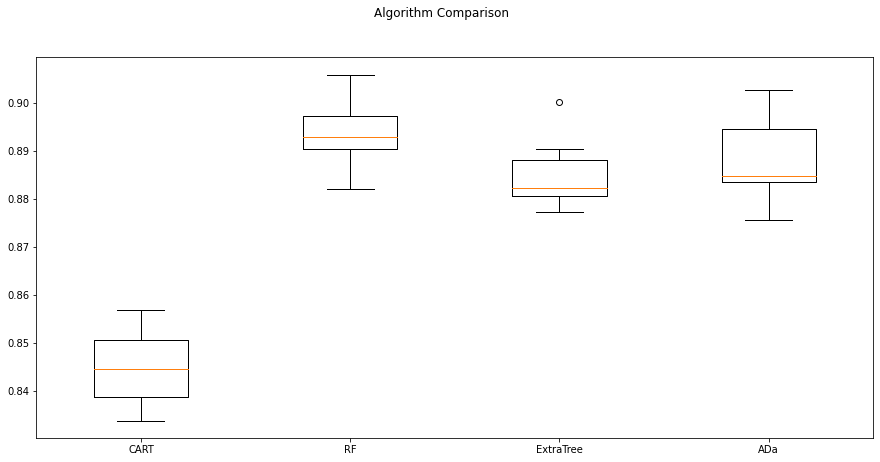

In [68]:
# Compare Algorithms
fig = plt.figure(figsize = (15,7))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
# for i in results_RF:
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [ ]:
# n_estimators      = [80, 100, 125, 150, 200]
# max_depth         = [20, 25, 30, 40]
# min_samples_split = [30, 35, 40, 50]
# min_samples_leaf  = [1, 2, 3, 5]

# hyperF  = {'n_estimators' : n_estimators, 
#            'max_depth' : max_depth,  
#            'min_samples_split' : min_samples_split, 
#            'min_samples_leaf' : min_samples_leaf}

# kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
# rf_Grid = GridSearchCV(estimator = RandomForestClassifier(random_state= 123), param_grid = hyperF, cv = 10, n_jobs = 4, scoring="accuracy",verbose=2)
# best_rf = rf_Grid.fit(X_train, Y_train)

Fitting 10 folds for each of 320 candidates, totalling 3200 fits

In [ ]:
# # best_RF = best_rf.best_estimator_ 
# best_RF =RandomForestClassifier(n_estimators= 100, max_depth= 20, min_samples_split= 30, min_samples_leaf=2, random_state=123)


In [44]:
num_folds = 10
seed= 123
scoring= 'accuracy'
models = []
best_RF = RandomForestClassifier(n_estimators= 200, max_depth= 30, min_samples_split= 30, min_samples_leaf=1, random_state=123, n_jobs = -1)
models.append(('best_RF', best_RF))
models.append(('RF', RandomForestClassifier(random_state=123)))
results_RF = []
names_rf = []
for name, model in models:
  kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
  cv_results_RF = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
  results_RF.append(cv_results_RF)
  names_rf.append(name)

  msg = "%s: %f (%f)" % (name, cv_results_RF.mean(), cv_results_RF.std())
  print(msg)

best_RF: 0.895095 (0.005894)
RF: 0.893253 (0.006599)


In [45]:
results_df = pd.DataFrame(results_RF, index = names_rf, columns = ["fold" + str(i) for i in range(1,11)])
results_df

fold1     fold2     fold3     fold4     fold5     fold6     fold7  \
best_RF  0.893953  0.897413  0.904428  0.897852  0.896975  0.898729  0.896975   
RF       0.891323  0.892591  0.903113  0.901797  0.893029  0.898290  0.893029   

            fold8     fold9    fold10  
best_RF  0.880754  0.891714  0.892153  
RF       0.878562  0.889084  0.891714

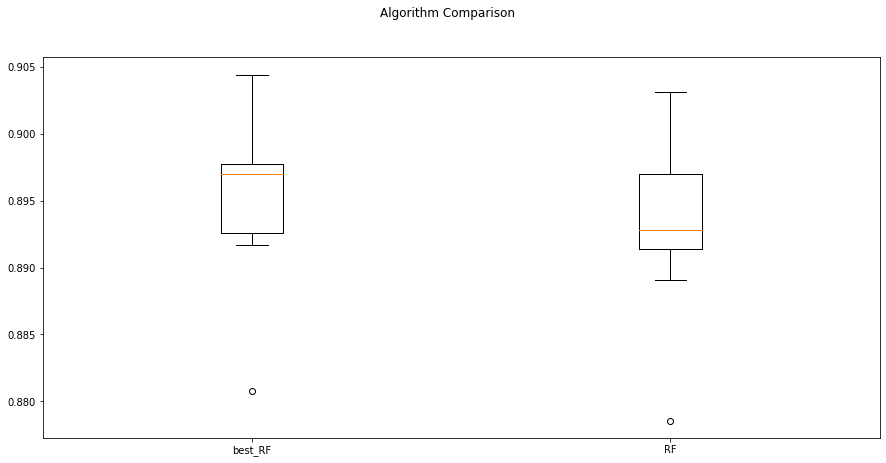

In [46]:
# Compare Algorithms
fig = plt.figure(figsize = (15,7))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
# for i in results_RF:
plt.boxplot(results_RF)
ax.set_xticklabels(names_rf)
plt.show()

In [9]:
# best_RF = RandomForestClassifier(n_estimators= 100, max_depth= 30, min_samples_split= 30, min_samples_leaf=1, random_state=123, n_jobs = 4)
best_RF = RandomForestClassifier(n_estimators= 200, max_depth= 30, min_samples_split= 30, min_samples_leaf=1, random_state=123)

best_RF.fit(X_train.values, Y_train)
preds = best_RF.predict(X_test.values)
accuracy_score(Y_test,preds)

0.8899251441894711

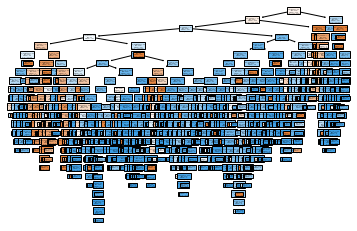

In [55]:
from sklearn import tree
_ = tree.plot_tree(best_RF.estimators_[0], feature_names=X_train.columns, filled=True)

In [ ]:
# import dtreeviz
# viz = dtreeviz(rf.estimators_[0], X, y, feature_names=X.columns, target_name="Target")
# viz

[[3592  710]
 [ 187 3660]]


Text(0.5, 1.0, 'Confusion Matrix')

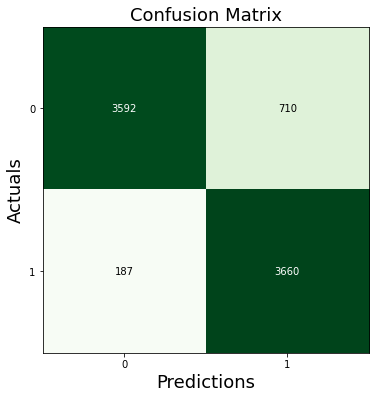

In [13]:
conf_matrix = confusion_matrix(Y_test, preds)
print(conf_matrix)
fig, ax = plot_confusion_matrix(conf_mat=conf_matrix, figsize=(6, 6), cmap=plt.cm.Greens)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)

In [11]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, preds))

              precision    recall  f1-score   support

           0       0.95      0.83      0.89      4302
           1       0.84      0.95      0.89      3847

    accuracy                           0.89      8149
   macro avg       0.89      0.89      0.89      8149
weighted avg       0.90      0.89      0.89      8149



In [100]:
importance = pd.concat([pd.DataFrame(X_train.columns),
                          pd.DataFrame(np.transpose(best_RF.feature_importances_))], axis = 1)
importance.columns = ['Features', 'Coeff']
importance = importance.sort_values('Coeff', ascending=False)
importance

Features     Coeff
8           After_Click  0.341973
11  date_unregistration  0.334682
12      Late_submission  0.140928
9          Before_Click  0.049669
0           code_module  0.036742
10    date_registration  0.020913
3     highest_education  0.014421
6       studied_credits  0.014210
4              imd_band  0.013738
2                region  0.012721
1                gender  0.007342
13          learn_again  0.006494
5              age_band  0.003532
7            disability  0.002637

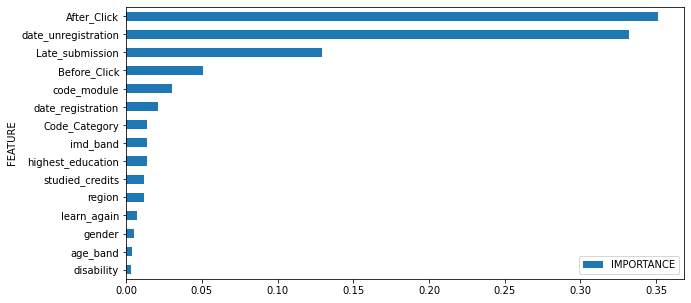

In [50]:
importances = pd.DataFrame({'FEATURE':X_train.columns,'IMPORTANCE':np.round(best_RF.feature_importances_,3)})
importances = importances.sort_values('IMPORTANCE',ascending=True).set_index('FEATURE')
importances.plot(kind = "barh", figsize = (10,5))
plt.show();

In [12]:
joblib.dump(best_RF, open('best_model.sav', 'wb'))

In [ ]:
with open("C:\\Users\\HUY LOL\\Downloads\\OULAD\Model\\model_predict.sav", 'rb') as f:
    model = joblib.load(f)
model.predict([[2,1,2,4,1,1,1,1,100,0,30,0,1,1]])

In [57]:
X_train.columns

Index(['code_module', 'gender', 'region', 'highest_education', 'imd_band',
       'age_band', 'studied_credits', 'disability', 'After_Click',
       'Before_Click', 'date_registration', 'date_unregistration',
       'Late_submission', 'Code_Category', 'learn_again'],
      dtype='object')

In [ ]:
X_train.columns